# Yelp Dataset Exploratory Data Analysis
Using the Yelp business dataset, perform exploratory data analysis and generate a new
business idea. Based on your analysis, generate at least two data visualizations, using
matplotlib, to help you communicate in your pitch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

## Load the Yelp Datasets

In [2]:
business = pd.read_csv('yelp_dataset/yelp_academic_dataset_business.csv')
#checkin = pd.read_csv('yelp_dataset/yelp_academic_dataset_checkin.csv')
#review = pd.read_csv('yelp_dataset/yelp_academic_dataset_review.csv')
#tip = pd.read_csv('yelp_dataset/yelp_academic_dataset_tip.csv')
#user = pd.read_csv('yelp_dataset/yelp_academic_dataset_user.csv')

In [3]:
business.head()

,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,...,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB
1,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,False,...,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,...,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB


# Introduction
The analysis mainly focus on the Yelp 'business' dataset.

My goal is to find a business, as well as the location of this business(whithin the United States), that will get high ratings. 

In [4]:
# First,  let’s take a general look at the information the 'business' dataset provides. 
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 61 columns):
address                                  180970 non-null object
attributes                               0 non-null float64
attributes.AcceptsInsurance              11671 non-null object
attributes.AgesAllowed                   397 non-null object
attributes.Alcohol                       47892 non-null object
attributes.Ambience                      47577 non-null object
attributes.BYOB                          911 non-null object
attributes.BYOBCorkage                   1409 non-null object
attributes.BestNights                    6844 non-null object
attributes.BikeParking                   84891 non-null object
attributes.BusinessAcceptsBitcoin        12674 non-null object
attributes.BusinessAcceptsCreditCards    140391 non-null object
attributes.BusinessParking               103424 non-null object
attributes.ByAppointmentOnly             45423 non-null object
attributes.Ca

# 1. Clean the data
The original dataset is very large, some of the columns are completed while some are occupied by NAN. So I want to simplify the dataset and choose the information that I'm interested in.

Since my EDA is focus on the business within the United States, I only want to leave the rows with American state abbreviations in 'state' column.

In [5]:
# Unique values in the 'state' column.
business['state'].unique()

array(['AB', 'NV', 'QC', 'AZ', 'ON', 'PA', 'OH', 'IL', 'WI', 'NC', 'BY',
       'NYK', 'SC', 'C', 'XGM', 'ST', 'IN', 'RP', 'CMA', 'NI', 'NLK',
       'VS', '6', 'CO', 'HE', 'VA', 'RCC', '01', 'SG', 'NY', 'OR', 'NW',
       '4', '10', 'CC', 'CA', '45', 'LU', 'MT', 'G', 'PO', 'B', 'VT',
       'AL', 'WAR', 'MO', 'HU', 'M', 'AR', 'O', 'FL', 'WA', 'KY', 'CRF',
       'TAM', 'NE', 'XMS', 'GA', 'AG', 'WHT', 'MA', 'V', 'BC', 'SP', 'DE',
       'HH', '11', 'CS', 'MN'], dtype=object)

Not all abbreviations are valid and useful. So I'd better create a list of state abbreviations myself.

In [6]:
# Create a list of state abbreviations of the United States
states = ['AL', 'AK', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 
          'LA', 'ME', 'MD', 'MA', 'MI', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 
          'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [7]:
# Create a 'state' dataframe 
df_state = pd.DataFrame({'state': states})
# Copy the original business dataset and assign it to df_business
df_business = business.copy()

In [8]:
# Use 'pd.merge' to get a new dataframe that merge the 'df_business' and the 'df_state' together, 
# so that the resulting dataframe will only contain information about the business whithin the United States.
# Assign the new dataframe as 'new_df'
new_df = pd.merge(df_business, df_state, on = 'state')
new_df.head()

,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,...,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,False,...,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV
1,703 N Rancho Dr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,36.178348,-115.176916,Citi Trends,NaN,89106,4,4.0,NV
2,1549 N Rancho Dr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10:0-18:0,1,36.188386,-115.186124,Nevada Title And Payday Loans,NaN,89106,4,1.0,NV
3,"3940 Martin Luther King Blvd, Ste 101",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,11:0-18:0,0,36.192284,-115.159272,CakesbyToi,NaN,89106,3,1.5,NV
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,36.260816,-115.171130,Park Stone Pavers,NaN,89031,20,5.0,NV


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139182 entries, 0 to 139181
Data columns (total 61 columns):
address                                  132156 non-null object
attributes                               0 non-null float64
attributes.AcceptsInsurance              10364 non-null object
attributes.AgesAllowed                   272 non-null object
attributes.Alcohol                       30728 non-null object
attributes.Ambience                      29808 non-null object
attributes.BYOB                          911 non-null object
attributes.BYOBCorkage                   1407 non-null object
attributes.BestNights                    4953 non-null object
attributes.BikeParking                   59147 non-null object
attributes.BusinessAcceptsBitcoin        12660 non-null object
attributes.BusinessAcceptsCreditCards    110299 non-null object
attributes.BusinessParking               71312 non-null object
attributes.ByAppointmentOnly             38637 non-null object
attributes.Cat

There're some columns that don't have enough non-null values, I want to filter those columns out to simplify the data.

In [10]:
# I would like to set the threshold of at least 30000 non-null values per column. 
new_df = new_df.dropna(axis = 'columns', thresh = 30000)

In [11]:
# This it the dataframe after all those clean up.
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139182 entries, 0 to 139181
Data columns (total 34 columns):
address                                  132156 non-null object
attributes.Alcohol                       30728 non-null object
attributes.BikeParking                   59147 non-null object
attributes.BusinessAcceptsCreditCards    110299 non-null object
attributes.BusinessParking               71312 non-null object
attributes.ByAppointmentOnly             38637 non-null object
attributes.GoodForKids                   42534 non-null object
attributes.OutdoorSeating                33801 non-null object
attributes.RestaurantsDelivery           32240 non-null object
attributes.RestaurantsGoodForGroups      33306 non-null object
attributes.RestaurantsPriceRange2        72016 non-null float64
attributes.RestaurantsReservations       31800 non-null object
attributes.RestaurantsTakeOut            38042 non-null object
attributes.WheelchairAccessible          38950 non-null object
attr

# 2. Exploration and Analysis
Let's EDA!

My analysis process contains two parts:
* Find the <b>best place</b> for the business.
* Find the <b>best business<b>.

## Where is best place for my new business?

In [12]:
# First, I would like to compare the average star rating for the businesses among all the cities in the United States.
# Group 'state' and 'city' together and get the total counts and average star rating of the businesses in a city.
df_groupby_state_city = new_df.groupby(['state', 'city'])['stars'].aggregate(['count', np.mean]).rename(
    columns = {'mean': 'average star rating', 
                'count': 'business counts'})

df_groupby_state_city.sort_values(by = ['average star rating', 'business counts'], ascending = False)[:10]

business counts  average star rating
state city                                                             
NC    Marvin                                     2                  5.0
OH    Cuyahoga Heights                           2                  5.0
PA    Allegheny                                  2                  5.0
      Mccandless Township                        2                  5.0
      Rillton                                    2                  5.0
AL    Henderson Nevada                           1                  5.0
AR    Mesa                                       1                  5.0
      Phoenix                                    1                  5.0
AZ    Ahwahtukee                                 1                  5.0
      Ahwatukee Foothills Village                1                  5.0

That seems not the right way to get the best position, because some cities have only one or two businesses, the average rating they receive is more likely to be effected by <b>extreme</b> values, while in some cities there are thousands of businesses, and the average scores in these places are more <b>objective</b>. So if I want to come to a more objective conclusion, I need to set a threshold for the number of businesses in a city.


In [13]:
# Limit the number of businesses in a city to at least 500. 
new_df_groupby_state_city = df_groupby_state_city[df_groupby_state_city['business counts']>500]

new_df_groupby_state_city.sort_values(by = 'average star rating', ascending = False)


business counts  average star rating
state city                                                 
AZ    Scottsdale                  8822             3.969225
      Gilbert                     3397             3.858552
OH    Lakewood                     509             3.843811
NV    Henderson                   4813             3.798255
AZ    Chandler                    4271             3.774292
      Tempe                       4491             3.740370
      Peoria                      1868             3.736884
NC    Huntersville                 608             3.731908
NV    Las Vegas                  28853             3.730912
AZ    Phoenix                    18561             3.685254
      Surprise                    1119             3.681859
SC    Fort Mill                    616             3.661526
AZ    Mesa                        6238             3.657342
WI    Madison                     3415             3.654173
PA    Pittsburgh                  6802             3.640179
AZ    Glendale                    3469             3.634765
NC    Matthews                     726             3.614325
OH    Cleveland                   3506             3.597690
NC    Charlotte                   9203             3.583288
AZ    Goodyear                     827             3.570738
      Avondale                     663             3.496983
NV    North Las Vegas             1507             3.486729
NC    Concord                      849             3.477621
IL    Champaign                   1243             3.469429

### Scottsdale, AZ is the winner!
Great! I get the best place for the new business, where it will get high ratings!


## What's the new business?

Now I want to dig into all the businesses in Scottsdale, by looking for the right category of business in Scottsdale that received the highest rating, I will get the answer.

In [14]:
# Create a new dataframe that only contains information about Scottsdale
df_scottsdale = new_df[new_df['city'] == 'Scottsdale']
# Before dig into the 'categories', remove all the null values
df_scottsdale = df_scottsdale[df_scottsdale['categories'].notnull()]

In [15]:
# This function is used to classify all the business in Scottsdale into 9 categories.
def classify(s):
    s = s.lower()
    category = ''
    if 'food' in s or 'restaurant' in s or 'coffee' in s or 'wine' in s:
        category = 'Restaurant' 
    elif 'hotel' in s:
        category = 'Hotel'
    elif 'fitness' in s or 'gym' in s:
        category = 'Gym'
    elif 'pet' in s:
        category = 'Pet'
    elif 'medical' in s or 'dentist' in s or 'doctor' in s or 'health' in s: 
        category = 'Health'
    elif 'cloth' in s or 'shop' in s or 'fashion' in s:
        category = 'Shopping Center'
    elif 'service' in s:
        category = 'Service'
    elif 'it' in s or 'computer' in s or 'internet' in s:
        category = 'IT'
    else:
        category = 'Else'
    return category

In [16]:
# Apply the function to 'categories' and create a new column called 'classified'
df_scottsdale['classified'] = df_scottsdale.categories.apply(classify)
df_scottsdale.head()

,address,attributes.Alcohol,attributes.BikeParking,attributes.BusinessAcceptsCreditCards,attributes.BusinessParking,attributes.ByAppointmentOnly,attributes.GoodForKids,attributes.OutdoorSeating,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,...,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,classified
35705,34522 N Scottsdale Rd,NaN,True,True,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,...,1,33.798826,-111.930420,Mattress Firm Carefree,NaN,85266,11,5.0,AZ,Shopping Center
35712,6316 N Scottsdale Rd,full_bar,False,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,True,False,True,...,1,33.530358,-111.925905,Fat Ox,NaN,85253,234,4.0,AZ,Restaurant
35713,2515 N Scottsdale Rd,none,True,True,"{'garage': True, 'street': False, 'validated':...",NaN,True,False,True,True,...,1,33.475349,-111.925657,Tang Dynasty Restaurant And Bar,NaN,85257,28,3.5,AZ,Restaurant
35718,9719 N Hayden Rd,full_bar,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,True,False,True,...,0,33.574998,-111.905421,Vocé Ristorante and Lounge,NaN,85258,13,4.0,AZ,Restaurant
35731,4282 N Drinkwater Blvd,full_bar,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,True,NaN,True,...,0,33.498163,-111.923683,E4,NaN,85250,15,2.5,AZ,Else


In [17]:
# Group the Scottsdale dataframe by 'classified', and calculate the average star rating in each group
classified_avg_star = df_scottsdale.groupby('classified').stars.aggregate([np.mean]).rename(
    columns = {'mean': 'average star rating'})
classified_avg_star

,average star rating
classified,
Else,4.088710
Gym,4.495714
Health,4.141926
Hotel,3.626866
IT,3.346154
Pet,4.297297
Restaurant,3.654610
Service,4.024644
Shopping Center,3.945261


Let's visualize them!

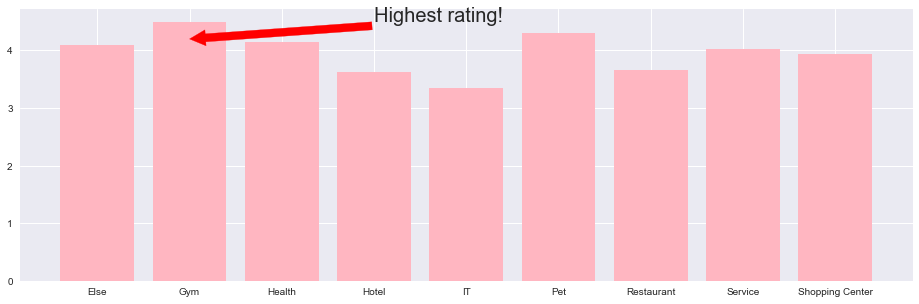

In [18]:
fig, ax = plt.subplots()

# Use bar plot to visualize different categories and their corresponding avarage rating
ax.bar(classified_avg_star.index, classified_avg_star['average star rating'], 
       color = 'lightpink')

ax.annotate('Highest rating!', 
            size = 20, 
            xy = (1, 4.2), xytext = (3, 4.5), 
            arrowprops = dict(
               width = 8, 
               headwidth = 16, 
               headlength = 16, 
               color = 'red'
           ))

fig.set_size_inches(16, 5)


### Sports won!
It's clear from the figure above that <b>GYM</b> got the highest average rating, so I would choose gym as the new business.

Moreover, I want to know more details about what this new gym should look like. So let's dig into business attributes to find which attributes will have positive effect to getting high ratings.

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139182 entries, 0 to 139181
Data columns (total 34 columns):
address                                  132156 non-null object
attributes.Alcohol                       30728 non-null object
attributes.BikeParking                   59147 non-null object
attributes.BusinessAcceptsCreditCards    110299 non-null object
attributes.BusinessParking               71312 non-null object
attributes.ByAppointmentOnly             38637 non-null object
attributes.GoodForKids                   42534 non-null object
attributes.OutdoorSeating                33801 non-null object
attributes.RestaurantsDelivery           32240 non-null object
attributes.RestaurantsGoodForGroups      33306 non-null object
attributes.RestaurantsPriceRange2        72016 non-null float64
attributes.RestaurantsReservations       31800 non-null object
attributes.RestaurantsTakeOut            38042 non-null object
attributes.WheelchairAccessible          38950 non-null object
attr

In [20]:
# Put several attributes I'm interested in into the list
attributes = ['attributes.BikeParking', 'attributes.OutdoorSeating', 'attributes.Alcohol', 
              'attributes.BusinessAcceptsCreditCards', 'attributes.GoodForKids', 'attributes.WiFi']

In [21]:
# Creat dataframes for each attribute with their average star rating, and put them in 'df_by_attributes' list
df_by_attributes = []
for item in attributes:
    df = new_df.groupby([item])['stars'].aggregate(
        [np.mean]).rename(columns = {
        'mean': 'average star rating'})
    df_by_attributes.append(df)

# Now, I get a list of dataframes
# Take the dataframe of 'attributes.BikeParking' as an example:
df_by_attributes[0] 

,average star rating
attributes.BikeParking,
False,3.537770
True,3.778626


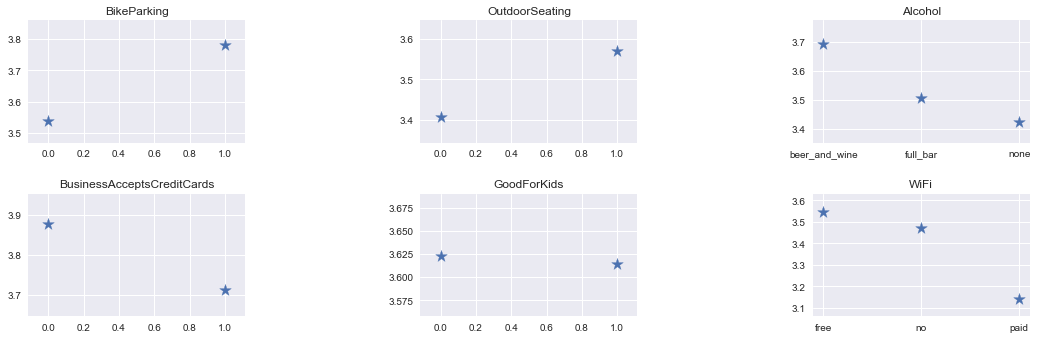

In [22]:
# Let's visualize them!
titles = [s.split('.')[-1] for s in attributes] # I will use titles to title the scatter plots below

# Draw the scatter plots in seperate axes
fig, ax = plt.subplots(nrows = 2, ncols = 3)

for i in range(len(df_by_attributes)):
    ax.flat[i].scatter(df_by_attributes[i].index, 
                       df_by_attributes[i]['average star rating'], 
                       marker = '*', 
                       s = 150)
    ax.flat[i].set(title = titles[i])
    

fig.tight_layout()
fig.set_size_inches(16, 5)


# 3. Conclusion and Business Proposal
### Now, I can conclude that the new high-rating business will be a cool GYM in Scottsdale, AZ, and it should better:
1. have bike parking
2. have outdoor seating
3. sell beer and wine    
4. do not accept credit cards    
5. not good for kids
6. have free WiFi

